## Biota Skills Evaluation

The goal of this notebook is to assess several sets of skills that are used on a daily basis at Biota.

Instructions:
* Each section contains it's own set of questions which should be answered to the best of your ability
* If the answer to a direct question is not known to you currently, state that you have not seen that command or usage before. Then search the internet for the answer and provide it.
* If you cannot answer a question, provide a list of your thought processes, and what you tried along the way. This is important for Biota since we often want to accomplish the right thing, but may need help on the execution. This is materially different from not knowing what the most appropriate thing to do is in the first place.

Packages:
* This evaluation should be completable with only the basic packages listed below. If you find yourself needing different packages, please install them and note what and why you are using something specifically.

Execute the cells below to import the relevant packages and functions

In [3]:
%matplotlib inline

In [4]:
# general packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

#Packages that were used that I coudn't figure out how to get to work in Jupyter
#from emperor import Emperor #Graphing in Data Science section, 
#from skbio import OrdinationResults
#Install/Import QIIME packages? I could not figure out how to run it from within Jupyter.
#!conda install -c qiime2/label/r2018.6 qiime2 # Installing from within Jupyter hungup so I will just use my terminal for qiime analysis.



### Unix

1)Unix commands are often used at Biota and in bioinformatics and data science in general.

Write the commands necessary to:
1. Create a directory named "test"
   
2. Create an empty file name "foo.txt"
    
3. Create a directory inside of "test" called "temp"
    
4. Copy "foo.txt" into "temp"
    
5. Change the name of "foo.txt" to "bar.txt"
   
6. Print the path to the current working directory
  
7. Change the current working directory to home
  
8. Explain the difference between a relative and absolute path
        A relative path takes into account the current working directory, absolute path specifies the complete root location and known directory of a file or dataset.

In [25]:
!mkdir test
!touch foo.txt 
!mkdir -p test/temp
!cp ./foo.txt ./test/temp
!mv ./test/temp/foo.txt ./test/temp/bar.txt
!pwd
!cd ../


mkdir: test: File exists
/Users/earlziebarth/WZ Biota Test


**2) Write the command to look at the first 15 lines of a text file called "sequences.fna" found in the home directory**

In [7]:
!head -n15 sequences.fna

## Python

Biota performs data science and develops code exclusively in python. Therefore, a working understanding of python, general syntax, and basic scripting abilities are needed.

#### 1)
Write a function to evaluate whether parentheses are matching across a string. In other words each open bracket has a matching closing bracket and are correctly ordered. The input should by a string and the return should be a boolean - `True` if the brackets are correct `False` if they are not. The only characters used will be `'{}[]()'`

In [5]:
def check_brackets(x):
    #Not even parenthases case, divide length of input by 2 to see if it is even number
    if len(x)%2 != 0:
        return False
    open_set = ('([{') #open
    matching = set([('(',')'), ('[',']'),('{','}')]) #matching case
    queue = [] #stack set
    for i in x: #scan the string
        if i in open_set: 
            queue.append(i) #append parenthesis to stack
        else:
            if len(queue) == 0: #check if stack is empty
                return False 
            last = queue.pop()  
            if (last, i) not in matching: #check if last opened is match, if not unbalanced
                return False
    return len(queue) == 0
        

In [6]:
#should return False
check_brackets('{([((()])))[][[()]]}')

#should return True
check_brackets('()[]{}')

#should return False
check_brackets('{(})')

#should return True
check_brackets('[[([{[()]}])]]')

True

#### 2) 
Write a function that takes a minimum and maximum and returns the number of perfect squares that exist in that range (inclusive). The max and min will always be integers and always given in the correct order

In [7]:
#I solved a similar problem in the past, using ceiling and floors.
def perfect_squares(x, y):
    #Case for y<0
    if y<0:
        #There are no perfect squares less than 0
        return 0
    #Case for x<0
    if x<0:
        #Set x=0 since there are no negative perfect squares
        x=0
        
        #Take the square root of our limits
    low = np.sqrt(x) #square root of lowest value (x)
    high = np.sqrt(y) #square root of highest value (y)
        
        #Rounding: move inwards towards the next highest & next lowest perfect square's roots in our range
    low = np.ceil(low)
    high = np.floor(high)
        
        #Correct for the off by 1 error
    return high - low +1 

In [8]:
#return 2
perfect_squares(4, 9)
#return 1313
perfect_squares(100, 1748937)
#return 272340
perfect_squares(1341, 74189027341)
#additional test case result == 281
perfect_squares(112,85234)

281.0

In [10]:
%%timeit #Run the following code without removing this line
perfect_squares(1341, 99418990273411)

9.58 µs ± 765 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


#### 3)
Imagine a grocery store with multiple aisles and multiple people waiting in each line. You quickly look at the items in each customers basket and know exactly how long it will take them to check out. If each customer always chooses the shortest line, calculate how long it will take for all customers to go through checkout. For example if you have 3 customers who will take 5, 10, and 3 minutes each to go through checkout and there is only one lane available it will take 18 minutes, if there are two aisles available it will take ten minutes

In [9]:
#Create function with two input variables (customers, n)
#customers = #array representing queue and value is total checkout time for each person
#array will populate until lines_out is empty

def queue_time(customers, n):
    lines_out = [0]*n #set array size for number of lanes to n
    
    for i in customers: #iterate through each customer and assign them to a checkout line
        
        lines_out[0] += i  #for each customer assign them to a lane for however many customers there are
        lines_out.sort()  #return an integer and sort by lowest first
        
    return max(lines_out) #return total checkout time 

In [10]:
#should return 26 minutes
#queue_time([10, 3, 1, 26, 21, 23], 4)
#should return 84 minutes
queue_time([10, 3, 1, 26, 21, 23], 1)
# should return 10
#queue_time([5, 10, 3], 2)

84

## GitHub

1. Write the command to clone a directory called "git@github.com:user/foo" (not a real repository)
2. Change into that directory
3. Create a branch called "test"
4. change into that branch
5. Create an empty file name "foo.txt"
6. Add that file to the staging area
7. Commit that file
8. Push that file to the master branch on github


!git clone git@hub.com:user/foo 
!cd foo    
!git checkout -b test
!touch foo.txt
!git add .
!git commit -m "commit message"
!git push origin master

## Statistics at Biota

#### 1) Give a brief definition of p-values and type 1, and type 2 errors

P-value is a test statistic that is used to determine if the results from sample data is significant if it is within the set arbitrary threshold. The p-value is used to see if the null hypothesis is rejected or not. In the case of gene expression studies, the null hypothesis would represent that the gene is not expressed and the alternative hypothesis would be that the gene is expressed. \

Type I errors (false positive) occur when the null hypothesis is true, and it is rejected. In the case of gene expression, it would be a gene that has been said to be expressed when really it was not expressed. \

 Type II errors (false negative) would arise when the null hypothesis is false, and it is not rejected. In the case of gene expression, a type II error occurs when a gene is said not to be expressed but actually it is expressed. \
 
In my Functional Genomics course that I took, I learned about the importance of Type I and Type II errors and how they are used in conjunction with determining the actual number of 
calculate more information such as the sensitivity (proportion of correctly ID'd positives) and specificity ratio (proportion of correctly ID'd negatives) of expression data. This information gives insight to the dataset as a whole, and can be used to determine how well it went. Controlling Type I errors are important because they indicate whether expression is occuring or not, for example in the case where assessing a sample for disease biomarkers. It is crucial to make sure that the call is true so you can accurately assess if the genes indicating disease are being expressed.


#### 2) Explain the bias/variance tradeoff

Prediction errors like bias and variance arise when training a machine learning algorithm, aiming to achieve low bias and low variance to achieve accurate prediction performance when testing a dataset. 

Bias reflects the ability of a model to accurately predict data, while variance refers to the sensitivity of the model to the sampled data (how well the model will work with different data).
Because they are directly correlated, when the bias of a dataset is increased as a response the variance decreases; and vice versa.  Balance between bias and variance within machine learning is crucial to understanding the predictive performance when analyzing datasets and the behavior of the machine learning algorithm to ensure accuracy.

#### 3) Explain the complexity/interpretability tradeoff

When a model is interpreted, it can provide insight to relationships between samples (inputs and outputs). The complexity/interpretability tradeoff arises when model interpretability decreases as a result of the model becoming more complex and more accurate. As a model is optimized to become more accurate, more model parameters and resources are introduced the model becomes less accurate when being tested on other datasets. If the model becomes more complexed, it will have a more difficult time making accurate predictions.

References:
#“Hands-On Machine Learning with Scikit-Learn and TensorFlow by Aurélien Géron (O’Reilly).#Copyright 2017 Aurelien Geron, 978-1-491-96229-9.

#### 4) Define and explain the differences in predicting continuous and categorical labeled data

Supervised learning can be used to characterize microbial communities, and can provide useful analysis for analyzing information such as microbiome data. Machine learning can be used to train a model set of samples with known class labels (either continuous or categorical), and use that model is then used to predict the class of unlabeled samples. 

With respect to microbiome analysis, an example of predicting categorical labeled data would be predicting what samples came from a specific body site. This type of predictive modeling while using categorically labeled data in ML is a classification problem due to the chance of misclassifying the data into an incorrect category.

An example of predicting continuous data, would be to predict the age of the subject from which the sample was collected, or to identify mislabeled samples that are found in microbiome datasets. Dealing with predicting continuous data is a regression problem, and with machine learning it gives researchers ability to quickly categorize new samples as opposed to manually curating through existing data to gain insights.

#### 5) Give a definition and explain the purpose of splitting data into a test and training set, and the purpose of crosss validation

Splitting data into a test and training set is commonly used in machine learning algorithms to creat models to analyze large datasets. When used with genomic data, machine learning is a powerful tool that can give valuable insights to predicting taxonomy, gene regulation, and gene function.

In order to more accurately assess how our machine learning model works, data is normally split into a test and training set. Overfitting can arise if the model has been overfit to the training data by using too many features.  

Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it. Cross validation is used to assess the predictive performance of the model created. In order to determine the accuracy of predictions that the ML algorithm is producing, it is important to test and see how the model performs by testing out multiple datasets against the model to ensure an unbiased result.  "Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it." [OpenML](https://www.openml.org/a/estimation-procedures/1)


6) Explain the "curse of dimensionality" How does would this affect a classification task such as random forests or support vector machines


I am not really to familiar with machine learning so I looked up information pertaining to random forests and the curse of demensionality with respect to metagenomics to find out more imformation.

Machine learning methods such as Random Forest are useful in identifying sets of features (i.e. gene variants) that are predictive in function or associated with a label (disease). Random forst classification models have a high-prediction accuracy and provide information on importance of variables (i.e. SNPs) for classification. RFs are a [popular tool](https://academic.oup.com/bib/article/14/3/315/255469) that is used for pattern recognition when analyzing 'omics datasets for gene predition, pathway analysis, and genetic association [Chen, Ishwaran](https://www.sciencedirect.com/science/article/pii/S0888754312000626). 

When analyzing a large dataset, there are far more features than there are samples in the dataset, so there are risks of overfitting the data when you select for too many features in your training algorithm. The curse of demensionality arises in life science datasets because the number of variables far exceeds the sample number.
It is often a good idea to try to reduce the dimension and features of your training data, because if you add more features in an attempt to make a more accurate classification you degrade the performance of the classifier and obtain inaccurate data when processing new samples.

References:
#“Hands-On Machine Learning with Scikit-Learn and TensorFlow by Aurélien Géron (O’Reilly).#Copyright 2017 Aurelien Geron, 978-1-491-96229-9."

## Biology

#### 1) Explain why 16S is commonly used in marker gene studies

The 16S rRNA is one of the most conserved genes found in all prokaryotic species, making it an easy target for comparative genomic analysis. The evolutionary function of the 16s rRNA gene has remained the same over time, making it a reliable genetic marker for genomic sequencing. Because it is a good target, there is a high abundance of reference sequences that can be used to identify microbial species via sequencing alignment. 


#### 2) Explain the difference between alpha and beta diversity

Alpha diversity examines the species diversity present in a single sample or microbial environment. It can be used to describe species richness within a sample, and can be used to determine their taxonomic relationships.
Beta diversity would be examining the species diversity in one environment and comparing it to another environment. 

From the Data Science example below, I went ahead and ran some additional tests within QIIME2 to produce visuals examining the alpha and beta diversity.

I produced a box and whisker plot by running Faith Phylogenetic diversity test on the samples.txt metadata file. From the figure, you can see that there is very little species diversity present between subject 1 and subject 2 found in on both hands. One can also infer that the bacteria found in the gut and tongue are less diverse than those found on the hands, this is because our hands interact with our environment and are more prone to acquire foreign bacterial species and are thus more likely to contain a higher species richness.
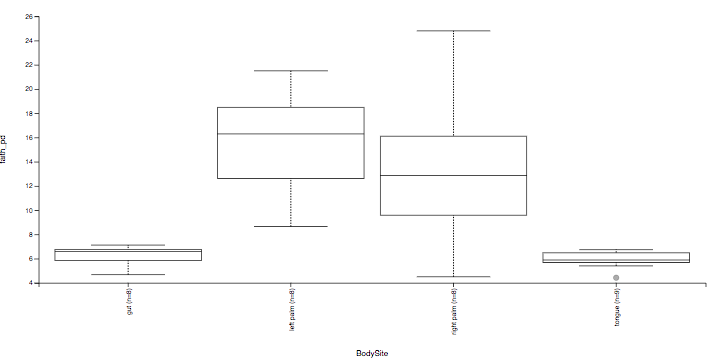


The image below was produced in QIIME2 using a Beta diversity test in pairwise fashion, to determine which specific ‘BodySite’ groups are different form one another. When examining the subject from the sample metadata, you can see a clear correlation in the taxonomy differences based on the ‘BodySite’. It can also be observed that the Bacteria that are found in the tongue and on both hands are significantly different than those found in the gut.

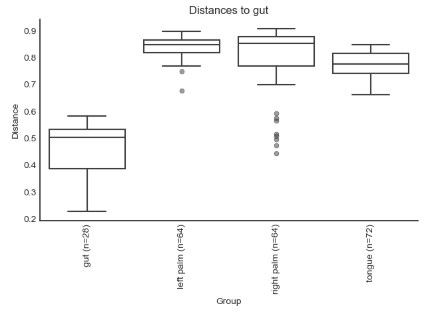




#### 3) Microbial ecology data tends to be compositional in nature, (counts of features are relative to one another) explain the implications of this in longitudinal data

When analyzing microbial ecology, samples are collected from the environment for analysis and are processed and sequenced. Most of the time, these samples contain a diverse abundance of organisms that can be either closely or distantly related. The results obtained from sequencing represent the total read counts in a high throughput sequencing run are of a fixed size, the random sample of the relative abundance of the molecules that are present in the underlying microbial ecosystem ( [Gloor et al.](https://www.frontiersin.org/articles/10.3389/fmicb.2017.02224/full) ). When molecules are assigned taxonomy, the comparison of taxon relative abundance in the sample is not equivalent to the comparison of taxon relative abundance as found in the ecosystem (naturally).

When performing high throughput sequencing, the number of counts reflects the proportion of counts per feature per sample multiplied by sequencing depth. Only relative abundances can be inferred from sequencing results, because when samples are sequenced absolute count information is lost because the dataset reflects normalized counts that are performed on the data.

With sequencing data, you cannot infer absolute counts (i.e. how many of a certain bacteria were present in a certain sample). It is not possible to predict the relationship between absolute abundance in the environment and the relative abundance after sequencing. Differential (relative) abundance measures so not account for compositionality ([Gloor et al.](https://www.frontiersin.org/articles/10.3389/fmicb.2017.02224/full)).

Because this, traditional statistical methods perform badly when analyzing this sort of data and can lead to misleading results that are unpredictable in nature. It is important to consider each step of analysis that involves compositional data in order to adapt the statistical method to . Research protocols have been adapted to convert microbiome datasets to relative abundances and normalized counts, in order to account for analyzing compositional data.



## Data Science @ Biota

 **1) Create a variable named `samples` by reading in the sample metadata as a pandas dataframe from the file `samples.txt`. Set the index as the `#SampleID` column. (The sample metadata is information contained about the samples they are sequenced.)**

In [27]:
samples = pd.read_csv("samples.txt", sep='\t', index_col='#SampleID')


**2) Create a variable named `data` by reading in the sample by feature counts from the file `data.txt`. Set the index as the first column named `_id`.**

In [57]:
data = pd.read_csv("data.txt", sep='\t', index_col='id')
data

,4386761,1050608,2595164,816470,410908,503354,4375688,4128584,748537,946344,...,New.CleanUp.ReferenceOTU2814,New.CleanUp.ReferenceOTU2819,New.CleanUp.ReferenceOTU2820,New.CleanUp.ReferenceOTU2821,New.CleanUp.ReferenceOTU2827,New.CleanUp.ReferenceOTU2829,New.CleanUp.ReferenceOTU2842,New.CleanUp.ReferenceOTU2849,New.CleanUp.ReferenceOTU2855,New.CleanUp.ReferenceOTU2865
id,,,,,,,,,,,,,,,,,,,,,
L1S140,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0
L1S208,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,5.0
L1S8,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
L1S281,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,21.0,9.0,0.0,0.0,0.0,0.0,8.0
L3S242,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
L2S309,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
L2S357,0.0,1.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
L4S112,0.0,3.0,0.0,11.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
L2S155,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**3) Create a varabiel names `features` by reading in the features table. Set the index as the first column names `_id`.**

In [29]:
features = pd.read_csv("features.txt", sep='\t', index_col='_id')

**4) Biota's databases are organized such that the `samples` and `features` tables contain metadata about the rows and columns of the `data` table. Confirm that: a) the index of the `samples` table is contained in the index of the `data` table. b) the columns of the `data` table are contained in the rows of the `features` table.**

In [14]:
#.isin() function for checking metadata
#(a) Index of Samples is w/i index of data table
print(samples.index.isin(data.index)) \

#(b) Columns of data is w/i feature table
print(features.index.isin(data.columns))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]
[ True  True  True ...  True  True  True]


**5) Explore the `samples` metadata. Perform a "groupby" function to show how many sequenced samples are available for each subject ("Subject" column) across antibiotic usage ("ReportedAntibioticUsage" column)**

In [30]:
samples.groupby('Subject')['ReportedAntibioticUsage'].value_counts().unstack()

ReportedAntibioticUsage,No,Yes
Subject,,
subject-1,15,3
subject-2,12,4



**6) Using `matplotlib`, create a visual to summarize the number of samples available for each subject according to Year, Month, and Day. (This is deliberately open ended - what visual might be most compelling and informative for a Fortune 500 customer?)**

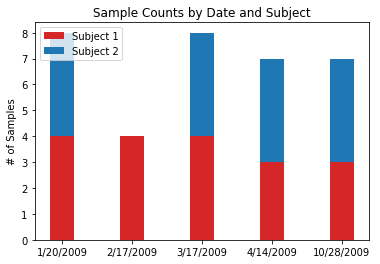

In [33]:
#Examine the data by subject, date, and number of samples
#check_samples = samples.groupby(['Subject', 'Date']).size().reset_index(name='#ofSamples')

#Add 'Date' column to samples.txt and combine Year, Month, Day with .to_datetime
#samples['Date'] = pd.to_datetime(samples.Year*10000+samples.Month*100+samples.Day, format='%Y%m%d')

dated_samples = samples.groupby(['Month', 'Day', 'Year', 'Subject']).size().reset_index(name='#ofSamples')

# Somehow jump from here
ds1 = dated_samples[dated_samples['Subject'] == 'subject-1']['#ofSamples']
ds2 = dated_samples[dated_samples['Subject'] == 'subject-2']['#ofSamples']

# To Here?
ds1 = (4,4,4,3,3)
ds2 = (4,0,4,4,4)

N = 5 #number of bars
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, ds1, width, color='#d62728')
p2 = plt.bar(ind, ds2, width, bottom=ds1)

plt.ylabel('# of Samples')
plt.title('Sample Counts by Date and Subject')

# These dates probably shouldn't have to be hardcoded in...
plt.xticks(ind, ('1/20/2009', '2/17/2009', '3/17/2009', '4/14/2009', '10/28/2009'))
plt.yticks(np.arange(0, 9, 1))
plt.legend((p1[0], p2[0]), ('Subject 1', 'Subject 2'))
plt.show()

# This table indicates that subject-2 is missing data from 02-17-2009
# dated_samples.groupby('Subject')['Date'].value_counts().unstack()

# A fortune 500 customer would most likely want to know that there was
# an error in recieving the sample from 'subject-2' (dated: '02/17/2009') 
# and that we should inform them that it is absent from the dataset.
# It is also possible that because the data is missing, results might not be representative
# of a dataset that included the missing samples. Results might be affected in downstream
# analysis.



**7) Transform the `data` table to relative abundances - this is done by dividing the counts found in each sample (row) but the row sum. Name this new table `data_ra`.**

In [620]:
data_ra = data.div(data.sum(axis=1), axis=0) \

data_ra

,4386761,1050608,2595164,816470,410908,503354,4375688,4128584,748537,946344,...,New.CleanUp.ReferenceOTU2814,New.CleanUp.ReferenceOTU2819,New.CleanUp.ReferenceOTU2820,New.CleanUp.ReferenceOTU2821,New.CleanUp.ReferenceOTU2827,New.CleanUp.ReferenceOTU2829,New.CleanUp.ReferenceOTU2842,New.CleanUp.ReferenceOTU2849,New.CleanUp.ReferenceOTU2855,New.CleanUp.ReferenceOTU2865
_id,,,,,,,,,,,,,,,,,,,,,
L1S140,0.000590,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000590,0.000000,0.000000,0.000000,0.000000,0.000000,0.000354
L1S208,0.000304,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000101,0.002433,0.000000,0.000000,0.000000,0.000000,0.000000,0.000507
L1S8,0.000240,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
L1S281,0.000132,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000132,0.002782,0.001192,0.000000,0.000000,0.000000,0.000000,0.001060
L3S242,0.000898,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
L2S309,0.000000,0.000538,0.000000,0.000000,0.000000,0.001076,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
L2S357,0.000000,0.000330,0.000000,0.001980,0.000330,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
L4S112,0.000000,0.000308,0.000000,0.001129,0.000103,0.000103,0.000103,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000103,0.000000,0.000000,0.000000,0.000000
L2S155,0.000000,0.000203,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000203,0.000406,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


**8) Determine the top 10 Genus level taxa found across both subjects. The genera level labels can be found in the `features` table.**

In [639]:
#Find frequency of 'Genus' using .value_counts() 
#When .value_counts() is performed, 'g__' appears first with 1009 hits
#Create df and remove 'g__' from list of top 10
topGenus = features['Genus'].value_counts().nlargest(11)
top10 = topGenus.iloc[1:] #remove label 'g__'
top10


# I'm certain there is a more percise way to go about doing this, possibly
# through QIIME or another tool that. I researched online and found a tool called
# qiime taxa collapse, whcih can collapse a taxonomic table down to a specific level.

 g__Bacteroides        296
 g__Streptococcus      125
 g__Prevotella          82
 g__Pseudomonas         76
 g__Corynebacterium     72
 g__Lachnospira         59
 g__Neisseria           53
 g__Oscillospira        51
 g__Staphylococcus      50
 g__Haemophilus         48
Name: Genus, dtype: int64

**9) Create a bar plot of the top 10 genera broken down by Subject and by ReportedAntibioticUse.**

My initial attempt was to create a multibar graph using only pandas and mathplotlib but following additional research online, I found that QIIME would be a more appropriate tool in order to properly work with the data structures that I was given. 

I discovered how QIIME and pandas can be used in conjunction with python to do some pretty cool analysis. I spent a good amount of time teaching myself QIIME, and by reproducing a couple example datasets from tutorials on QIIME's website. I also had to do a crash course on the [analysis workflow](https://docs.qiime2.org/2018.6/tutorials/overview/) to get a better understanding of the inputs and outputs, and what artifacts are required to perform various types of analysis. 

I tried to find an examples of how to call upon QIIME2 artifacts through python code and pandas dataframes, but I had a hard time finding any examples online that were used in the current version of QIIME2. I am certain that I would be able to grasp the concept easily if I saw some example code, but given my time constraints to produce results for this job application I decided to just use QIIME2. I am not sure if I would have been able to execute using QIIME1, but from what I read online it was no longer supported. Also, I tried to find examples of how to use QIIME2 with python and pandas dataframes to analyze data but found little examples online, and at this point I went ahead and just read the entire QIIME for dummies page, and was able to create a visual using QIIME2 and the data provided for this assesment.  

Given more time to research, I’m sure I would have found some and been able to call upon the QIIME2 artifacts with python code to produce visuals. I was also having a hard time getting QIIME2 to run in Jupyter notebooks, so for the sake of turnaround time I did the analysis in my terminal.

I was uncertain as to whether I could use Q2 to cluster through the data provided and sort by subject and antibiotic usage, or if I had to use python and pandas DB to call upon the data from the spreadsheets that I was given. Because it was my first time using both and I had no one to consult with about it, I went ahead and used Q2 in my terminal with the given files to produce a relative abundance table sorted at the Genus level broken down by Subject and ReportedAntibioticUse.

The below bargraph is a relative abundance bargraph, and shows the relative abundances of the top 10 genus (level 6). To display only the top 10, I manually selected them from within the legend that was produced so there is a chance that it might not be 100% accurate because it was manually select across the legend. The whitespace underneath each sample on the x axis represents the result of the difference in relative abundance of bacteria present in the sample that were NOT in the top 10 genus. It appears white because those Genus were not in the top 10 most abundant that was manually selected from the legend.

In order to get a better depiction of the data, the graph was separated in half by subject (subject-1 and subject-2) and was then broken down by antibiotic usage. I also felt that I could obtain more insights from the information if I also sorted each sample obtained by time, and also labeled which body site it came from.



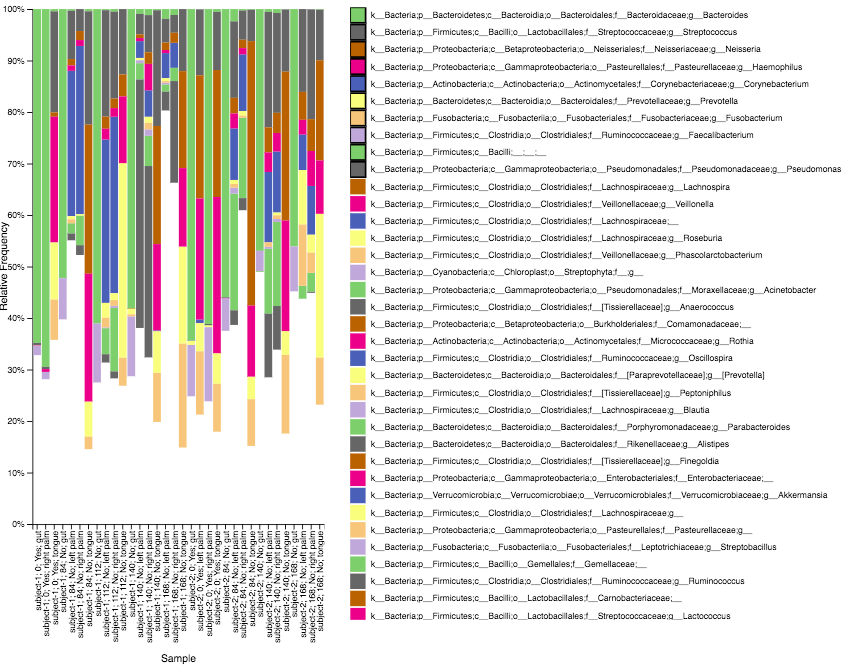




**10) Using scikit-learn, train a regressor on the most dominant genus from subject-1 and test that regressor on subject-2. Plot the results and summarize relative statistics.**

In [68]:
# I was unable to properly answer this question, however I feel that I grasp the concept of what it is asking me to do.
# The objective of training a regressor on the most dominant genus from subject1 and testing
# that on subject2 would result in the ability of the model to predict taxonomies from sequences.
# To do this I would need to pick a reference database, train a classifier algorithm to assign
# taxonomies to sequences (using a reference database as the training set), and run the classifier algorithm
# on my sequences.


# Because I have never directly experimented with machine learning before this,
# I had to do some research on how, and also research into the caveats of 
# analyzing large volumes of metagenomic data with machine learning to make predictions
# derived from the data. I need to decide what kind of regressor test to do and what parameters
# to run the test with. 

# I decided to do research to see if there was a way to use scikit-learn from within
# QIIME, and it looks like you can. However I tried to find some examples and did not have any luck.
# 

# To do this via python and not a plugin, I would need to obtain Scikit-learn tool, and I would
# need to have the most dominant genus from subject 1 in a Pandas Dataframe or NumPy array format.
# I am also trying to understand which data to use, should I use the data_ra relative abundance data?
# In order to use it I would have to find a way to go through all the columns that correspond to a the taxonomy
# and select those for the most dominant genus ( which I believe is Bacteroides) and then apply all of those
# columns with counts corresponding to abundance and find out which of the samples ('_id') correspond to 
# subject 1 and subject 2 and seperate those. 



from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

# I could not figure out how to pass the most dominant genus into the pd.DataFrame

#dom_genus_subject_1 = pd.DataFrame(data.txt, columns=columns)# load the dataset as a pandas data frame
#y = subject2.target # define the target variable (dependent variable) as y

# create training and testing vars
#X_train, X_test, y_train, y_test = train_test_split(dom_genus_subject_1, y, test_size=0.2)
#print(X_train.shape, y_train.shape)
#print(X_test.shape, y_test.shape)

# fit a model
#lm = linear_model.LinearRegression()
#model = lm.fit(X_train, y_train)
#predictions = lm.predict(X_test)

## The line / model
#plt.scatter(y_test, predictions)
#plt.xlabel(TrueValues)
#plt.ylabel(Predictions)

#create the regressor: reg

# reg = LinearRegression()
# predict_genus = np.features(min(X_genus),max(X_genus)).reshape(-1,1)
# reg.fit(X_genus, y)


#Example format
# X = zSample.data[:, :2] In this example it would select for most dominant genuc
# y = zSample.target #This would be subject-2
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)
# scaler = preprocessing.StandardScaler().fit(X_train)
# X_train = scaler.transform(X_train)
# X_test  = scaler.transform(X_test)

# To set this up, I need to figure out how to connect the data from the features.txt(taxonomy) table
# to the data found in data.txt (counts).
# I did see from my previous analysis of relative abundance that Bacteroidies was the most
# prevelant genus found across all samples, so would I test for Bacteroides counts from subject1 on subject2?
# I was also had trouble on how to call the most common genus from the features.txt file
# based on their _id in order to train the most dominant genus and connect that to 
# the data.txt file to seperate by subject1 and subject2.

# Or could it be that I need to identify within the data.txt tile the column corresponding to the OTU that appears with the most frequency? 
# I have never done this analysis so it would help to be able to talk to someone about this, however
# I do comprehend it I just could not figure out how to call the most dominant genus from within only the samples from subject 1,
# and then test that against only the ones from subject 2.

# The result would produce a relation between the genus of one sample to another?

#seperate subject-1 and subject-2

#s1 = samples['L1S8':'L5S203'].groupby(['Date','Subject']).size().reset_index(name='#ofSamples')
#s2 = samples['L1S140':'L6S93'].groupby(['Date','Subject']).size().reset_index(name='#ofSamples')



######## QIIME2 WORKFLOW ATTEMPT
# The most dominant genus from only subject 1? 
# Sort data into two seperate groups by subjects?

#QIIME Notes - way to classify with machine learning:
#Predicting sample metadata values with q2-sample-classifier
#choosing classifier in qiime 
#feature-classifier classify-sklearn

#Related to answering number 8 possibly, sort subject-1 into its artifact and search for unique features
#qiime feature-table filter-samples \
#  --i-table table.qza \
#  --m-metadata-file samples.txt \
#  --p-where "Subject='subject-1'" \
#  --o-filtered-table s1-table.qza

#qiime feature-table filter-samples \
#  --i-table table.qza \
#  --m-metadata-file samples.txt \
#  --p-where "Subject='subject-2'" \
#  --o-filtered-table s2-table.qza

##Possible tool to use to answer this?

#   qiime sample-classifier classify-samples \
#+     --i-table moving-pictures-table.qza \
#+     --m-metadata-file moving-pictures-sample-metadata.tsv \
#+     --m-metadata-category BodySite \
#+     --o-visualization moving-pictures-BodySite \
#+     --p-optimize-feature-selection \
#+     --p-parameter-tuning \
#+     --p-estimator RandomForestClassifier \
#+     --p-n-estimators 100
 
#I also found doumentation regraurding QIIME2's 'predict' function, it might be of use
# predict: Use trained estimator to predict target values for new samples
# https://docs.qiime2.org/2018.6/plugins/available/sample-classifier/predict/
    





**11) Calculate the Bray Curtis distance on the `data` and perform principal coordinates 
analysis on the resulting distance matrix. Plot the resulting PC1 and PC2 as a scatter plot. Color the points based on Subject and ReportedAntibioticUsage.**

I attempted to do a BC analysis using 'data.txt' but ended up recieving this error: 
There was an issue with loading the file data.txt as metadata:
#####################################
  Found unrecognized ID column name '_id' while searching for header. The first column name in the header defines the ID column, and must be one of these values:

  Case-insensitive: 'feature id', 'feature-id', 'featureid', 'id', 'sample id', 'sample-id', 'sampleid'

  Case-sensitive: '#OTU ID', '#OTUID', '#Sample ID', '#SampleID', 'sample_name'
  
I attempted to change the name of the index to just 'id' instead of '_id'
 #####################################
 
I tried to manually edit the data.txt file and rerun without the underscore in the index '_id' to one of the suggested column names, but got a different error saying that my declared metadata column was not correct. I tried to change the index to a suggested name, but I could not figure out the correct parameters to use for -m-metadata-column for running the command in my terminal.
I would need to identify which metadada column parameter to pass into the beta-group-significance test to perform a BC distance test on data.



To answer this question in some way and to exhibit technical competencies, I ran the QIIME in my terminal and ran BC test on the BodySite. I used QIIME to run a diversity beta-group-significance test on the samples.txt metadata and seperated it by BodySite. It calculates the distances between samples within a group (i.e. bodysite) and compares it to samples from other BodySites. This visual gives a good representation of what factors had an effect on the samples.

qiime diversity beta-group-significance \
  --i-distance-matrix core-metrics-results/unweighted_unifrac_distance_matrix.qza \
  --m-metadata-file data.txt \
  --m-metadata-column Subject \ #Not sure what to put here
  --o-visualization core-metrics-results/unweighted-unifrac-subject-group-significance.qzv \
  --p-pairwise

The scatterplot that I was able to produce was calculated for the Bray Curtis distance between BodySite = 'gut' and other bodysite samples. That I produced using a similar method in the tutorials, however it was not done explicitly using the 'data.txt' file that was asked to be used because I could not figure out the correct parameters to use for -m-metadata-column for running the command in my terminal because I kept recieving an error when using the "data.txt" file as specified in the problem "11)Calculate the Bray Curtis distance on the data and perform...". Also I was having a hard time incorporating the 3D API for interacting with emporer in Jupyter, so I captured a screenshot of the BC scatterplot.

Antibiotic usage is indicated by the shapes:Diamond shaped values, NO Antibiotic usage is indicated by a circle. Subject 1 is colored in Red, Subject 2 colored in Blue. 
Resulting scatterplot of resulting PC1, PC2, and DaysSinceExperimentStart.


Figure1: Antibiotic usage by subject from BC plot from the gut.
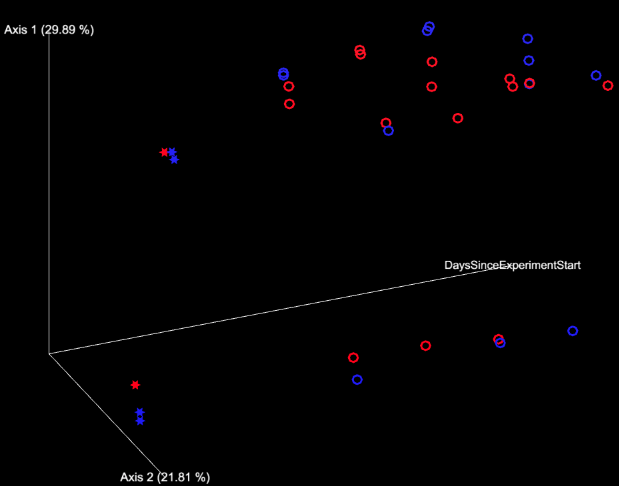
Legend:
Subjects (color): Subject-1 = Red, Subject-2 = Blue
Antibiotic use (shape): Yes = Star, No = Circle

From the scatterplot in Figure 1 it is clear to see that the samples obtained from the gut of both subjects are closely related.



Figure2: samples are colored by body site location
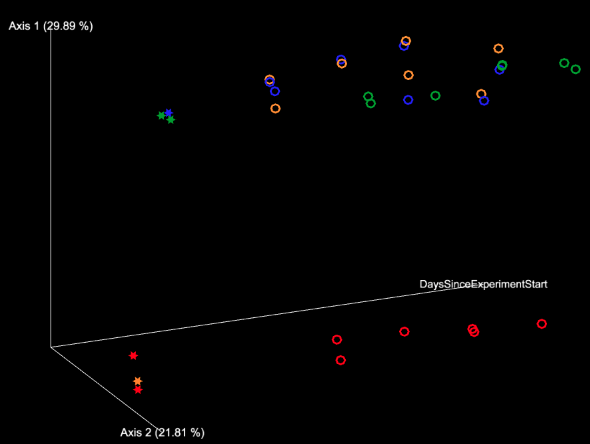
This is the same BC scatterplot but the labels are colored by BodySite. The image clearly depicts that the samples collected from the tongue (green), left palm(blue), right palm(orange) that the samples are less closely related to the samples obtained from the gut (red).




Below is the code I ran as part of my workflow to obtain the above image using the QIIME2 beta diversity tool to test whether distances between samples w/i a group, (i.e. same bodysite) are more similar to each other than they are to samples from other groups. As you can see from the second image, both samples have similar species of bacteria that are found in the gut 



qiime diversity beta-group-significance \
  --i-distance-matrix core-metrics-results/unweighted_unifrac_distance_matrix.qza \
  --m-metadata-file samples.txt \
  --m-metadata-column Subject \
  --o-visualization core-metrics-results/unweighted-unifrac-subject-group-significance.qzv \
  --p-pairwise


#Question 11 Use emporer to plot scatterplot of resulting PC1, PC2, and DaysSinceExperimentStart
#Graph resulting diversity beta-group-significance (bray_curtis_pcoa_results.qza) distance matrix using emporor

qiime emperor plot \
  --i-pcoa core-metrics-results/bray_curtis_pcoa_results.qza \
  --m-metadata-file samples.txt \
  --p-custom-axes DaysSinceExperimentStart \
  --o-visualization core-metrics-results/bray-curtis-emperor-DaysSinceExperimentStart.qzv

qiime tools view bray-curtis-emperor-DaysSinceExperimentStart.qvz


  
  
  
 

**12) Provide an analysis and summary of whether antibiotic or time was the strongest driver of the subject's microbial community.**

Based on the data I was able to produce, it would appear that time was the biggest driver of the subject's microbial community. As seen in the scatterplot above for the BC diagram produced for the distances between samples obtained, microbial communities became more established as time progressed. While Antibiotic treatment did an initial good job at minimizing the microbial diversity within the same bodysite (i.e. gut), overtime that microbial diversity was re-established. 

This can be observed through a relative abundance barplot of the species present from each sample, and you can see that those who reported Antibiotic usage had a lower abundance of microbial species present in their gut initially. This can be observed from the fact that Bacteroides abundance was over +60% in samples 1 and 2 from the gut that reported antibiotic usage. Overtime the samples became more diverse, this can be inferred from the relevant abundance barplot. One can observe a dropoff in the total abundance of the most prevelant species found overtime, as the samples become more diverse and more organisms colonize within the gut. It is pretty easy to see that the antibiotic did have an effect, because it enabled Bacteroides to become the most prevelant organism after the antibiotic wiped out a majority of the community.

Without consistant use of antibiotics, various microbial communities found at different sites of the body can re-establish themselves over time. A good example of this can be seen when looking at the relative abundance of species present in samples across time, while taking into account initial antibiotic usage.


For example when examining the sample taken from subject 2's gut, initial antibiotic usage at day 0 saw an 64.334% abundance of Bacteroides present. As the study progressed, by day 168 of the experiment the abundance of Bacteroides in the gut dropped to 46.084%. This is because species diversity of the microbial community increases over time, as the effects of the antibiotic are mitigated and the subject is no longer recieving treatment. 

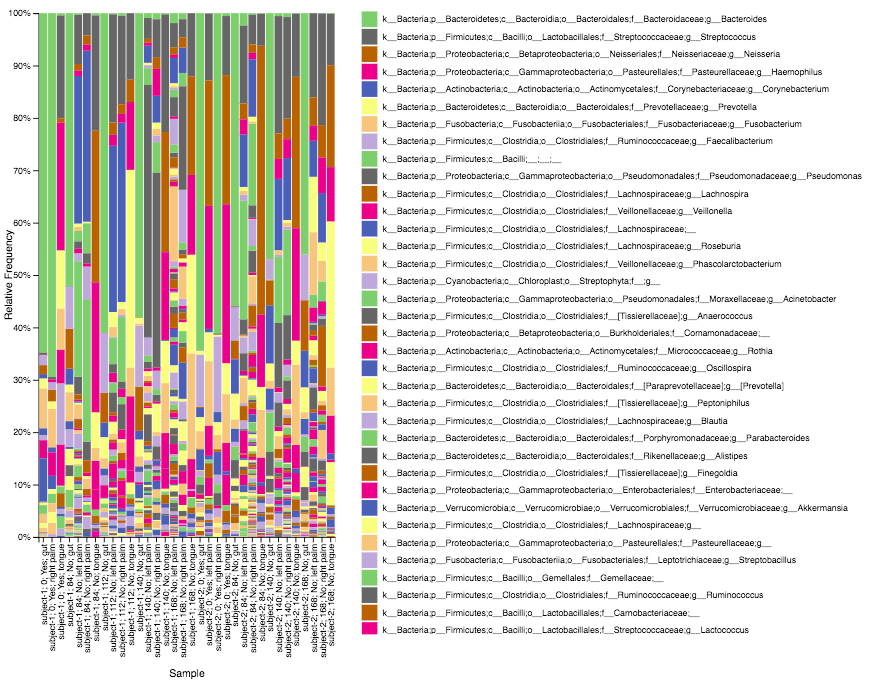






**Thanks! Please save this jupyter notebook with inline images, and email the resulting jupyter notebook to luke@biota.com (name this file "firstname_lastname_eval.ipynb" for example mine would be "luke_ursell_eval.ipynb" with no quotation marks)**

# Because I had not used pandas or QIIME before, I chose to first go through a complete QIIME tutorial 
# in my command line to better understand the workflow, data types, functions, and features 
# that are produced when analyzing data

# The tutorial I found used the same data from the example 'Moving Pictures of the humam #Microbiome' from a study published in 2011 (link: https://www.ncbi.nlm.nih.gov/pubmed/21624126). 
# The metadata for the file was identical to the data I was given so I figured it would serve as a 
# good learning tool to get comfortable with QIIME and to better understand the itermediary artifacts that are produced.
# Moving Pictures tutorial: https://docs.qiime2.org/2018.6/tutorials/moving-pictures/

    # I had to generate the artifacts table.qza and taxonomy.qza by demultiplexing the sequences
    # to assign barcodes to the samples (seen below) because I was not given any information about the 
    # types of files that I was given, format the reads came from, or what area they targeted for sequencing.
    
# my files = samples.txt (metadata), data.txt, features.txt (features), sequences.fna (fasta)

# https://docs.qiime2.org/2018.6/tutorials/moving-pictures/


# Notes for QIIME for dealing with raw sequencing data:
# Import the data into new directory:
# Sequencing data is multiplexed, sequences haven't been assigned samples.
# Demultiplex the sequence data to see which barcode is associated with which sample
# Demultiplex sequences to find out which barcode seq is associated w/ each sample.
# Demultiplexing we can see #sequences per sample, summary of distribution of sequence qualities across samples



# Complete workthrough of QIIME from given data.txt,sample.txt,features.txt files was 
# completed in my terminal because I could not get QIIME to load within Jupyter.

#My files given were: samples.txt,data.txt,features.txt., and sequences.fna 

#Post- split_libraries FASTA File Overview sequences.fna 
#Example view of one sequence
# >L1S140_0 HWI-EAS440_0386:1:25:1851:1463#0/1 orig_bc=ATGGCAGCTCTA new_bc=ATGGCAGCTCTA bc_diffs=0
# TACGTAGGGGGCAAGCGTTATCCGGATTTACTGGGTGTAAAGGGAGCGTAGACGGTGTGGCAAGTCTGATGTGAAAGACATGGGCTCAACCTGTGGACTGCATTGGAAACTGTCATA
#        
#

#from the tutorial I did for single end sequences
# I compared the files from the emp-single-end-sequnces.qza file to the sequnces I was given and they were the same.

#qiime tools import \
#  --type EMPSingleEndSequences \
#  --input-path samples.txt \
#  --output-path emp-single-end-sequences.qza \

#Demultiplex sequences to assign barcodes to samples
qiime demux emp-single \
  --i-seqs emp-single-end-sequences.qza \
  --m-barcodes-file samples.txt \
  --m-barcodes-column BarcodeSequence \
  --o-per-sample-sequences demux.qza

#qiime tools view demux.qzv #view quality table
#34 samples, sequence counts total 263878, 
#Sequencing quality drops off at about ~120 bases

# Sequence QC and freuency table construction using DADA2 to create 
# FeatureTable[Frequency] artifacts
qiime dada2 denoise-single \
  --i-demultiplexed-seqs demux.qza \
  --p-trim-left 0 \
  --p-trunc-len 120 \
  --o-representative-sequences rep-seqs-dada2.qza \
  --o-table table-dada2.qza \
  --o-denoising-stats stats-dada2.qza

# create visual
qiime metadata tabulate \
  --m-input-file stats-dada2.qza \
  --o-visualization stats-dada2.qzv

qiime tools view stats-dada2.qzv

## merge 
mv rep-seqs-dada2.qza rep-seqs.qza
mv table-dada2.qza table.qza

# Create FeatureTable and FeatureData summaries
# Info on how many sequences are associated with each sample and each feature.
# "feature-table tabulate-seqs" will provide a mapping of feature IDs to sequences (assigning taxa)

qiime feature-table summarize \
  --i-table table.qza \
  --o-visualization table.qzv \
  --m-sample-metadata-file samples.txt

#create visual
qiime feature-table tabulate-seqs \
  --i-data rep-seqs.qza \
  --o-visualization rep-seqs.qzv
qiime tools view rep-seqs.qzv

# ALIGNMENT & PHYLOGENY (this stuff is awesome, I love alignment based phylogenetic trees)
# Generate sequence alignment to generate metrics required for phylogeny 
# and counts of features per sample

#align the sequences using mafft
qiime alignment mafft \
  --i-sequences rep-seqs.qza \
  --o-alignment aligned-rep-seqs.qza

#Remove(mask) noise, filter alignments out that are highly variable
qiime alignment mask \
  --i-alignment aligned-rep-seqs.qza \
  --o-masked-alignment masked-aligned-rep-seqs.qza

#use FastTree to generate alignment from data, produces unrooted tree
qiime phylogeny fasttree \
  --i-alignment masked-aligned-rep-seqs.qza \
  --o-tree unrooted-tree.qza

#root the tree, apply to midpoint-root creating longest tip-to-tip distance in the unrooted tree

#Alpha and Beta diversity analysis
# Beta Diversity = Bray-curtis
# Even sampling (rarefaction) depth: ''--p-sampling-depth' parameter will randomly subsampe
# the counts from each sample to the value provided for this parameter
# review the information in table.qzv and choose value as high as possible to retain more sequences per sample
# Examining the graph of subject with sampling-depth 1109
qiime diversity core-metrics-phylogenetic \
  --i-phylogeny rooted-tree.qza \
  --i-table table.qza \
  --p-sampling-depth 1109 \
  --m-metadata-file samples.txt \
  --output-dir core-metrics-results
#will return all output artifacts classified under core-metrix-results (A&B diversity output)



#examine the microbial composition of the sample with Faith Phylogenetic Diversity
# Faith measures a communities richness (alpha diversity) and evenness metrics
qiime diversity alpha-group-significance \
  --i-alpha-diversity core-metrics-results/faith_pd_vector.qza \
  --m-metadata-file samples.txt \
  --o-visualization core-metrics-results/faith-pd-group-significance.qzv

qiime diversity alpha-group-significance \
  --i-alpha-diversity core-metrics-results/evenness_vector.qza \
  --m-metadata-file samples.txt \
  --o-visualization core-metrics-results/evenness-group-significance.qzv

# use PERMANOVA to analyze sample composition in metadata
# Will test whether distances between samples w/i a group, (i.e. same bodysite) are more similar
# to each other than they are to samples from other groups.

qiime diversity beta-group-significance \
  --i-distance-matrix core-metrics-results/unweighted_unifrac_distance_matrix.qza \
  --m-metadata-file samples.txt \
  --m-metadata-column BodySite \
  --o-visualization core-metrics-results/unweighted-unifrac-body-site-significance.qzv \
  --p-pairwise

qiime diversity beta-group-significance \
  --i-distance-matrix core-metrics-results/unweighted_unifrac_distance_matrix.qza \
  --m-metadata-file samples.txt \
  --m-metadata-column Subject \
  --o-visualization core-metrics-results/unweighted-unifrac-subject-group-significance.qzv \
  --p-pairwise


# Question 11 Use emporer to plot scatterplot of resulting PC1, PC2, and DaysSinceExperimentStart
#Graph resulting diversity beta-group-significance distance matrix created
qiime emperor plot \
  --i-pcoa core-metrics-results/unweighted_unifrac_pcoa_results.qza \
  --m-metadata-file samples.txt \
  --p-custom-axes DaysSinceExperimentStart \
  --o-visualization core-metrics-results/unweighted-unifrac-emperor-DaysSinceExperimentStart.qzv

qiime emperor plot \
  --i-pcoa core-metrics-results/bray_curtis_pcoa_results.qza \
  --m-metadata-file samples.txt \
  --p-custom-axes DaysSinceExperimentStart \
  --o-visualization core-metrics-results/bray-curtis-emperor-DaysSinceExperimentStart.qzv

#Alpha rarefaction plotting
# Alpha refraction plot indicated that the Bodysite 'Tongue' has the most microbial diversity
qiime diversity alpha-rarefaction \
  --i-table table.qza \
  --i-phylogeny rooted-tree.qza \
  --p-max-depth 4000 \
  --m-metadata-file samples.txt \
  --o-visualization alpha-rarefaction.qzv


#TAXONOMIC ANALYSIS
#Used Greengenes 13_8 99% OTUs training the feature-classifier
# First step is to assign taxonomy to the seqences in the samples.txt dataset and create an artifact
# Retrieve training set for OTUs for species identification
wget -O "gg-13-8-99-515-806-nb-classifier.qza" "https://data.qiime2.org/2018.6/common/gg-13-8-99-515-806-nb-classifier.qza"

qiime feature-classifier classify-sklearn \
  --i-classifier gg-13-8-99-515-806-nb-classifier.qza \ #import reference sequences
  --i-reads rep-seqs.qza \
  --o-classification taxonomy.qza

qiime metadata tabulate \
  --m-input-file taxonomy.qza \
  --o-visualization taxonomy.qzv


#Graph the relative abundance
qiime taxa barplot \
  --i-table table.qza \
  --i-taxonomy taxonomy.qza \
  --m-metadata-file samples.txt \
  --o-visualization taxa-bar-plots.qzv


#Differential abundance testing with ANCOM 
qiime feature-table filter-samples \
  --i-table table.qza \
  --m-metadata-file samples.txt \
  --p-where "BodySite='gut'" \
  --o-filtered-table gut-table.qza

#EXAMPLE GROUPING BASED ON THE GUT, because there will be many features across the bodysites
#qiime feature-table filter-samples \
#  --i-table table.qza \
#  --m-metadata-file samples.txt \
#  --p-where "BodySite='gut'" \
#  --o-filtered-table gut-table.qza


#This uses the code commented out two blocks above
qiime composition ancom \
  --i-table comp-gut-table.qza \
  --m-metadata-file samples.txt \
  --m-metadata-column Subject \
  --o-visualization ancom-Subject.qzv

#add-pseudocount which will produce a FeatureTable[Composition] artifact
# Based on frequencies of features on a per sample basis, won't take 0's
qiime composition add-pseudocount \
  --i-table gut-table.qza \
  --o-composition-table comp-gut-table.qza
#########
#########

#Number 10 example problem notes Train a regressor to predict which bodysite each sample
# originated from based on its microbial composition

qiime sample-classifier classify-samples \
	--i-table moving-pictures-table.qza \
	--m-metadata-file samples.txt \
	--m-metadata-columns Subject \#select by subject
	--o-visualization moving-pictures-Subject \
	--p-optimize-feature-selection \
	--p-parameter-tuning \
	--p-estimator RandomForestClassifier \
	--p-n-estimators 100





In [ ]:
Artifact API (https://docs.qiime2.org/2017.7/interfaces/artifact-api/)

In [50]:
#Trying to set up QIIME in jupyter notebooks was a pain for me, and because of the pressure to finish 
# this in a timely manner I obtained results as quickly as possible at the expense of pretty code and interactive visuals. 
# I know that it is probably a simple task, but given my lack of direct experience with these tools and
# lack of anyone to consult with I did the best I could!

# I spent a good amount of time researching how to use various functions with QIIME and it seems like 
# it is a very powerful tool that if I had a few examples of integrating QIIME with python I believe 
# I could become very efficient at analyzing data through a specific workflow. 
# as there were additional ideas that I had for additional analysis of the dataset.
# What species of bacteria were completely eliminated from the treatment during the second sampling? How closely related are the bacteria that were eliminated? Was there a specific bacteria that was eliminated at multiple bodysites as a result of antibiotic treatment? 

# I searched for a while and I honestly could not find an example of using qiime2 in Jupyter using python to convert the data to a dataframe for further analysis.
# I also couldnt find any information in regards to the skillset of integrating QIIME2-2018.6 with Python to perform analysis.
# Maybe it is just that the results of QIIME can be further analyzed using pandas?
# I also found information about developing plugins in python using QIIME's Artifact API (https://docs.qiime2.org/2017.7/interfaces/artifact-api/)
# Which could be very useful for developing proprietary tools used to assess and analyze samples from specific microbial niches.

